# K-Nearest Neighbor

In [2]:
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, roc_curve, auc, roc_auc_score

import matplotlib.pyplot as plt   

In [3]:
# Con la biblioteca pandas para manejo de datos, se cargan los datos del dataset Iris a la variable df_iris
df_train = pd.read_csv('Datasets/df_training_data.csv')
df_train.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,income
0,0,-0.875229,1.827188,-0.922465,0.973990,0.483697,-1.464248,-1.040758,0.012032,-1.060718,...,-0.101279,-0.960969,0.286668,0.998102,-1.111713,-0.569364,0.126315,0.339592,-1.066538,0
1,1,1.973559,-0.300123,-0.466477,-0.934539,-1.865897,-2.732302,0.004838,0.263600,-2.000352,...,-0.005159,0.360580,-0.634336,-0.483411,1.779636,-0.402493,1.028827,-0.601315,1.029725,0
2,2,-0.821570,1.329325,-1.838615,0.800666,0.561320,0.848246,1.101449,-1.890559,-0.206277,...,-0.036937,-0.101309,-0.454385,0.118475,-0.143640,-0.689294,-0.415948,-0.451705,1.081246,0
3,3,-1.888307,2.046005,0.922304,-0.763863,-0.653454,-0.366263,-0.307285,0.738609,2.190696,...,0.317959,2.004142,0.502578,0.276233,-0.012217,-0.530224,-0.657114,-1.089835,1.888881,0
4,4,2.474326,1.935869,-0.505624,-0.785949,-0.761554,0.736196,-0.661488,0.365629,1.048603,...,-0.024397,0.576223,0.222163,0.508983,-0.192275,-1.249880,0.495074,0.252813,0.939998,1


In [4]:
# Con la biblioteca pandas para manejo de datos, se cargan los datos del dataset Iris a la variable df_iris
df_test = pd.read_csv('Datasets/df_testing_data.csv')
df_test.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0,-2.627077,0.027154,0.943605,1.152598,-0.536753,-0.069425,0.796574,-1.139848,0.658624,...,-0.210658,-1.194057,-0.909509,-0.582169,0.264882,-0.504399,-1.022839,1.759881,-2.139488,0.189707
1,1,1.833685,-1.643168,-0.273275,0.237561,-0.876427,0.236787,1.803601,0.155887,-0.622980,...,-0.166890,-0.243123,-0.081944,0.610199,-0.164090,0.017458,-0.301869,-0.090138,0.369075,0.220760
2,2,-1.649783,-1.399860,0.428182,0.012395,1.396428,-2.359639,-1.000767,1.133564,1.288191,...,0.107440,-0.121598,2.629431,-0.410808,-0.604579,0.261456,0.471206,-1.890615,1.713886,0.578438
3,3,-1.302282,-1.335115,1.851840,1.316117,0.951216,-1.058210,1.237835,2.177814,-1.871296,...,-0.553010,-1.589903,-1.811022,1.229865,0.012790,0.107722,0.047660,-0.208360,-1.098562,1.081476
4,4,-0.614546,2.155938,-2.124583,0.246707,0.288170,-1.665895,0.901072,-0.125167,0.369875,...,2.643870,-0.100598,-0.079106,-0.204465,0.147004,0.101509,1.492607,0.724866,-0.055043,1.045808


In [5]:
x_cols = df_train.columns
x_data = df_train[x_cols[:-1]]
x_data

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0,-0.875229,1.827188,-0.922465,0.973990,0.483697,-1.464248,-1.040758,0.012032,-1.060718,...,-0.197345,-0.101279,-0.960969,0.286668,0.998102,-1.111713,-0.569364,0.126315,0.339592,-1.066538
1,1,1.973559,-0.300123,-0.466477,-0.934539,-1.865897,-2.732302,0.004838,0.263600,-2.000352,...,2.453279,-0.005159,0.360580,-0.634336,-0.483411,1.779636,-0.402493,1.028827,-0.601315,1.029725
2,2,-0.821570,1.329325,-1.838615,0.800666,0.561320,0.848246,1.101449,-1.890559,-0.206277,...,-0.150877,-0.036937,-0.101309,-0.454385,0.118475,-0.143640,-0.689294,-0.415948,-0.451705,1.081246
3,3,-1.888307,2.046005,0.922304,-0.763863,-0.653454,-0.366263,-0.307285,0.738609,2.190696,...,-0.198944,0.317959,2.004142,0.502578,0.276233,-0.012217,-0.530224,-0.657114,-1.089835,1.888881
4,4,2.474326,1.935869,-0.505624,-0.785949,-0.761554,0.736196,-0.661488,0.365629,1.048603,...,-0.422494,-0.024397,0.576223,0.222163,0.508983,-0.192275,-1.249880,0.495074,0.252813,0.939998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9044,9044,-2.570711,-0.071720,-0.298515,0.606642,-0.024124,0.289960,-0.345770,-0.931516,0.005912,...,-0.246610,0.300268,0.304467,0.403710,0.340074,0.173187,-0.340222,1.537782,0.477382,-0.176562
9045,9045,-1.219481,-2.215484,0.417069,1.109292,-2.173873,1.586911,-0.720065,0.414381,-0.728092,...,-1.461019,0.895904,-0.980800,-0.468752,2.019878,3.420934,0.607614,-1.795015,2.011780,1.026410
9046,9046,-1.448102,-0.677735,-1.876732,-1.844492,-1.128706,-0.023086,-0.505561,0.029671,0.687520,...,-0.560291,-0.414789,0.506456,-0.879881,-0.163540,0.270761,-0.042190,-0.218505,-0.441859,0.075245
9047,9047,0.054330,2.161888,-1.314207,1.500853,0.009238,-0.177245,1.133025,-1.697103,-0.736346,...,-0.123117,-0.094808,0.040943,-0.123704,0.068733,-0.230221,-0.579112,-1.217683,-0.282530,-0.740323


In [6]:
y_data = df_train[x_cols[-1]]
y_data

0       0
1       0
2       0
3       0
4       1
       ..
9044    0
9045    0
9046    0
9047    0
9048    0
Name: income, Length: 9049, dtype: int64

In [7]:
# Division del dataset (entrenamiento 70%, prueba 30%)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3 ,random_state=31)
print('Dimensiones de datos de entrenamiento')
print(str(x_train.shape) + ' ' + str(y_train.shape))
print('Dimensiones de datos de prueba')
print(str(x_test.shape) + ' ' + str(y_test.shape))

Dimensiones de datos de entrenamiento
(6334, 25) (6334,)
Dimensiones de datos de prueba
(2715, 25) (2715,)


In [8]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [9]:
# Creacion del modelo KNN
knn = KNeighborsClassifier()

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=4)

# Ajustar el modelo con GridSearchCV
grid_search.fit(x_data, y_data)

# Obtener los mejores parámetros y el mejor estimador
print("Mejores parámetros:", grid_search.best_params_)
best_knn = grid_search.best_estimator_

Mejores parámetros: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}


In [11]:
y_pred = best_knn.predict(x_test)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.99      0.87      2043
           1       0.79      0.09      0.16       672

    accuracy                           0.77      2715
   macro avg       0.78      0.54      0.51      2715
weighted avg       0.77      0.77      0.69      2715



In [13]:
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:",  accuracy)

Precisión: 0.7683241252302025


In [14]:
y_proba = best_knn.predict_proba(x_test)[:, 1]

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

In [16]:
auc = roc_auc_score(y_test, y_proba)

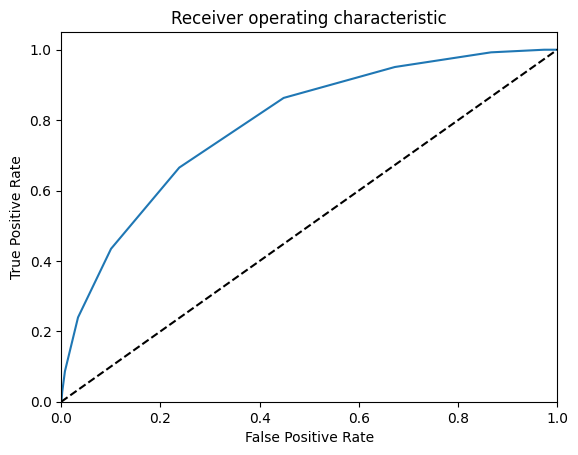

In [17]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()